## Data loading and comprehension

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv('C://Users/dell/Downloads/day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
#Checking the missing values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#plt.figure(figsize=(20, 12))
#sns.pairplot(bike)
#plt.show()

In [8]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Dropping those columns which are not adding the values

In [9]:
#instant is an index of the row and dteday having dates which we can also get by month and year columns, 
#casual and  registered columns 
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#Encoding the holiday
#bike.holiday = bike.holiday.map({'holiday':0,'weekday':1})

In [12]:
#plt.figure(figsize=(20, 12))
#sns.pairplot(bike)
#plt.show()

In [13]:
#Encoding the weathersit
bike.weathersit = bike.weathersit.map({1:'Clear', 2:'Cloudy', 3:'Light Snow', 4:'Heavy Rain'})

In [14]:
#Encoding the season
bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Summer'})

#Encoding the mnth
bike.mnth = bike.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 
                                       9:'sep', 10:'oct', 11:'nov', 12:'dec' })    
#Encoding the wwekday
bike.weekday = bike.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thur', 5:'fri', 6:'sat' })
    

In [15]:
#Encoding the  yr
bike.yr = bike.yr.map({0:'2018', 1:'2019'})

In [16]:
bike.weekday.unique()

array(['sat', 'sun', 'mon', 'tue', 'wed', 'thur', 'fri'], dtype=object)

In [17]:
#Checking for the null values
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [18]:
# There are few column's names are not clear hence renaming the names for better reading
bike.rename(columns={'mnth':'month', 'yr':'year', 'hum':'humidity'}, inplace=True )

In [19]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,2018,jan,0,sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,jan,0,sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the data

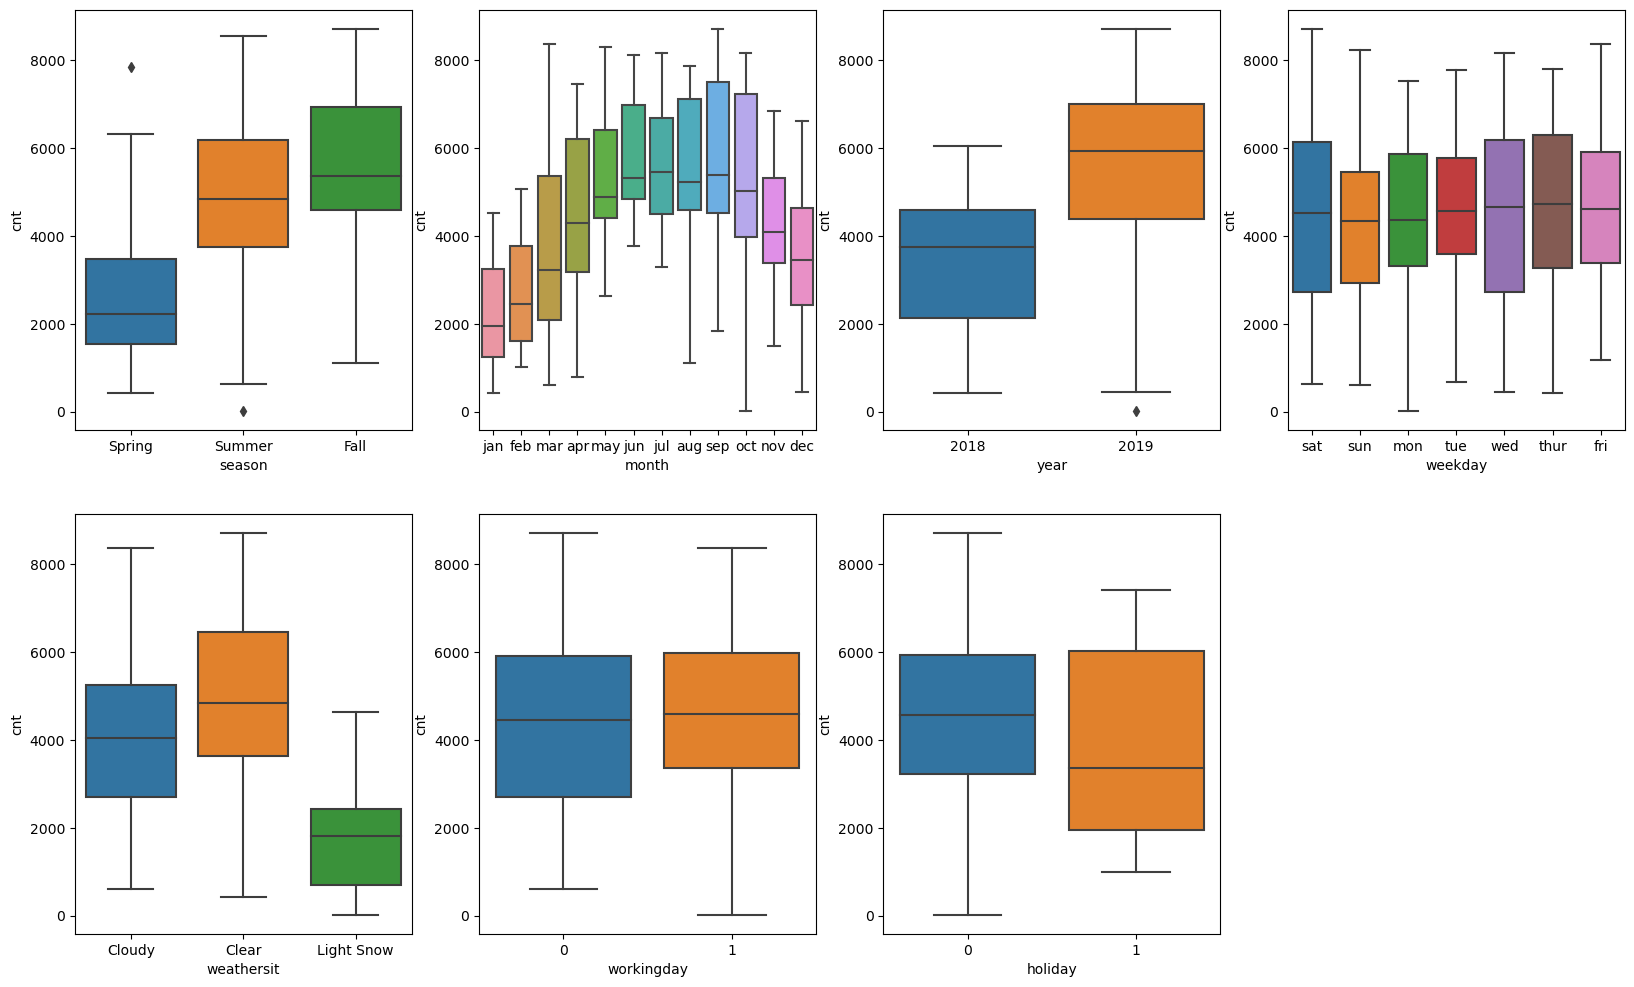

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y='cnt', data=bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y='cnt', data=bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'year', y='cnt', data=bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y='cnt', data=bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y='cnt', data=bike)
plt.subplot(2,4,6 )
sns.boxplot(x = 'workingday', y='cnt', data=bike)
plt.subplot(2,4,7 )
sns.boxplot(x = 'holiday', y='cnt', data=bike)
plt.show()



In [21]:
# function to create barplot related to categorical columns


def plot_bar_chart(vals):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=vals, y='cnt', data=bike)
    plt.subplot(1,2,2)
    sns.barplot(x=vals, y='cnt', data=bike, hue='year')
    plt.show()


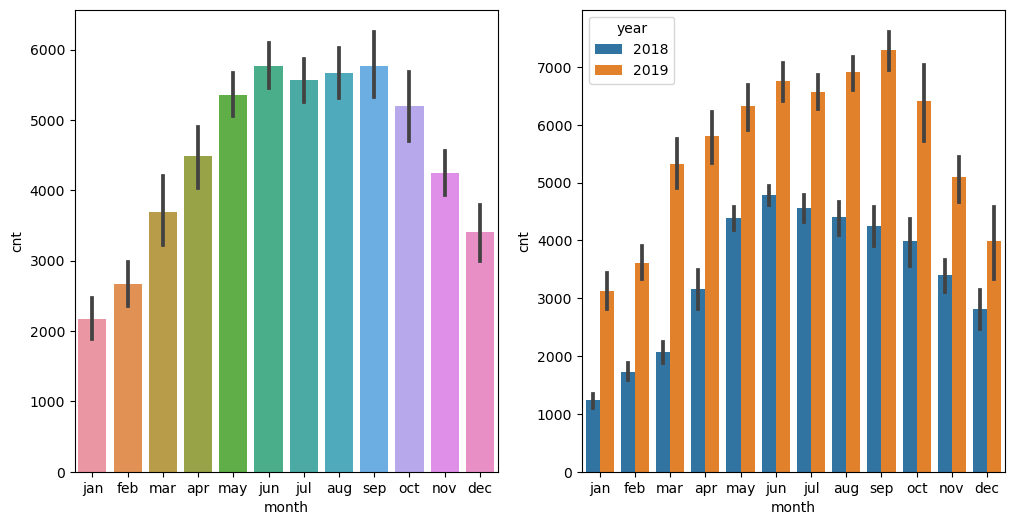

In [22]:
plot_bar_chart('month')

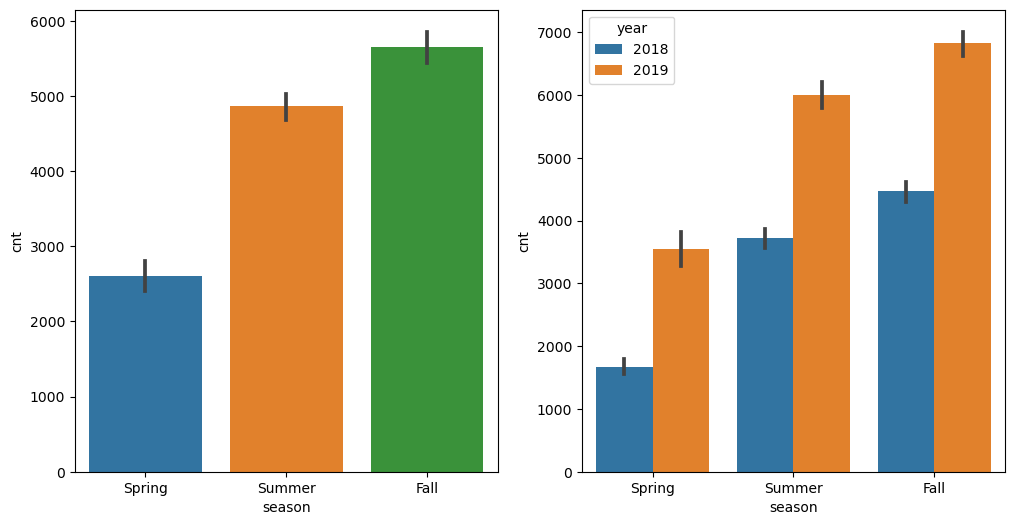

In [23]:
plot_bar_chart('season')

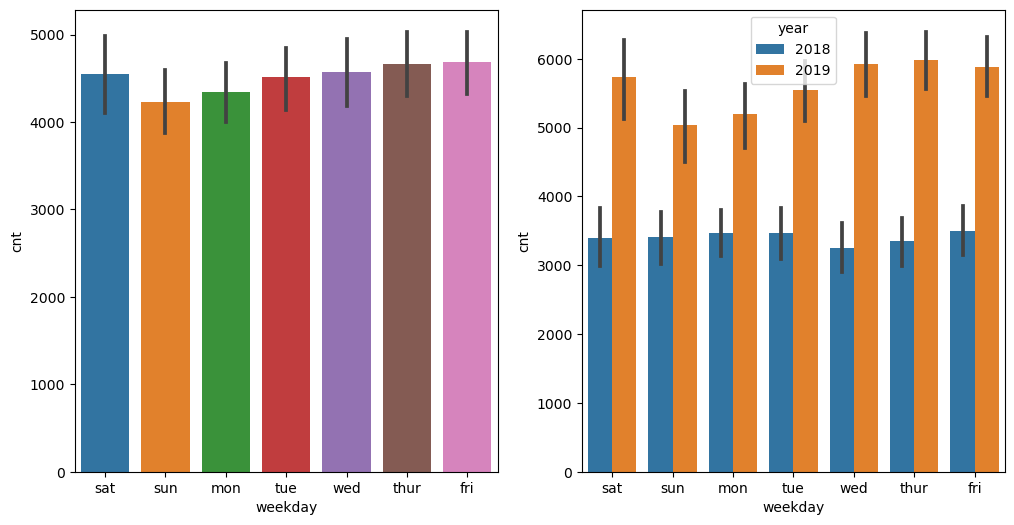

In [24]:
plot_bar_chart('weekday')

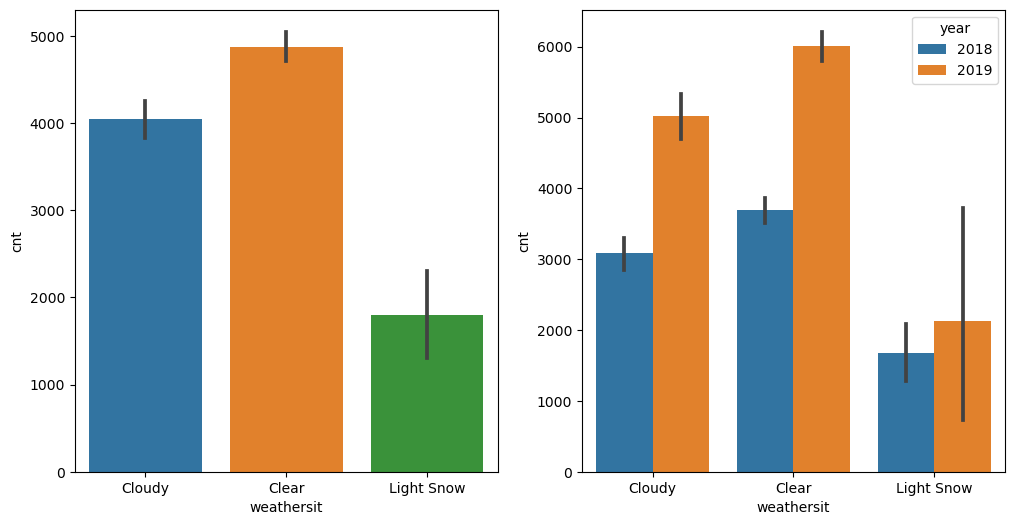

In [25]:
plot_bar_chart('weathersit')

# Data Preparation 

In [26]:
#Creating dummy variables for season, month, weekday and weathersit

season_data = pd.get_dummies(bike['season'], drop_first=True)
month_data = pd.get_dummies(bike['month'], drop_first=True)
weekday_data = pd.get_dummies(bike['weekday'], drop_first=True)
weathersit_data = pd.get_dummies(bike['weathersit'], drop_first=True)

In [27]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,2018,jan,0,sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,jan,0,sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
#Merging the new dummy variables with dataframe

bike_df = pd.concat([bike, weathersit_data, weekday_data,month_data, season_data], axis = 1)

In [29]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,jan,jul,jun,mar,may,nov,oct,sep,Spring,Summer
0,Spring,2018,jan,0,sat,0,Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,0,0,1,0
1,Spring,2018,jan,0,sun,0,Cloudy,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,0,0,1,0
2,Spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,1,0,0,0,0,0,0,0,1,0
3,Spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,1,0
4,Spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,1,0,0,0,0,0,0,0,1,0


In [30]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    object 
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Cloudy      730 non-null    uint8  
 13  Light Snow  730 non-null    uint8  
 14  mon         730 non-null    uint8  
 15  sat         730 non-null    uint8  
 16  sun         730 non-null    uint8  
 17  thur        730 non-null    uint8  
 18  tue         730 non-null    uint8  
 19  wed         730 non-null    u

In [31]:
# As we have created dummy variables hecne we can drop not required column
bike_df.drop(['season','month','weekday','weathersit'], axis=1, inplace = True)

In [32]:
bike_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Cloudy,Light Snow,...,jan,jul,jun,mar,may,nov,oct,sep,Spring,Summer
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,1,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,1,0,0,0,0,0,0,0,1,0


In [33]:
# Spiltting the dataframe in to Test and Train

df_train, df_test = train_test_split(bike_df, train_size=0.7, random_state=10)

In [34]:
#checking the shape of training dataset
df_train.shape

(510, 29)

In [35]:
#checking the shape of testing dataset
df_test.shape

(220, 29)

In [36]:
#using the MinMaxScaler for rescaling the features 
scaler = MinMaxScaler()

In [37]:
# Applying the scaler() to columns except dummy variables and 'yes/no' variables()

continous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
df_train[continous_vars] = scaler.fit_transform(df_train[continous_vars])

In [38]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Cloudy,Light Snow,...,jan,jul,jun,mar,may,nov,oct,sep,Spring,Summer
72,2018,0,1,0.298094,0.311594,0.393891,0.236118,0.194978,0,0,...,0,0,0,1,0,0,0,0,1,0
510,2019,0,0,0.778657,0.731886,0.694105,0.364071,0.737052,0,0,...,0,0,0,0,1,0,0,0,0,1
700,2019,0,0,0.327249,0.348399,0.809877,0.210252,0.509236,1,0,...,0,0,0,0,0,0,0,0,0,1
264,2018,0,1,0.694699,0.613206,0.910249,0.217975,0.526862,1,0,...,0,0,0,0,0,0,0,1,0,0
577,2019,0,1,0.811368,0.765180,0.624004,0.244886,0.863093,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Describing the dataset
df_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Cloudy,Light Snow,mon,...,jan,jul,jun,mar,may,nov,oct,sep,Spring,Summer
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.033333,0.690196,0.513354,0.498021,0.563841,0.342904,0.492000,0.345098,0.033333,0.147059,...,0.086275,0.068627,0.072549,0.084314,0.086275,0.090196,0.084314,0.092157,0.247059,0.517647
std,0.179682,0.462867,0.233194,0.213764,0.183851,0.162760,0.236196,0.475867,0.179682,0.354512,...,0.281045,0.253068,0.259649,0.278131,0.281045,0.286744,0.278131,0.289531,0.431725,0.500179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.314983,0.319432,0.426048,0.225964,0.325456,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.506613,0.504690,0.562400,0.322431,0.490945,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.721686,0.672738,0.697621,0.434281,0.675812,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


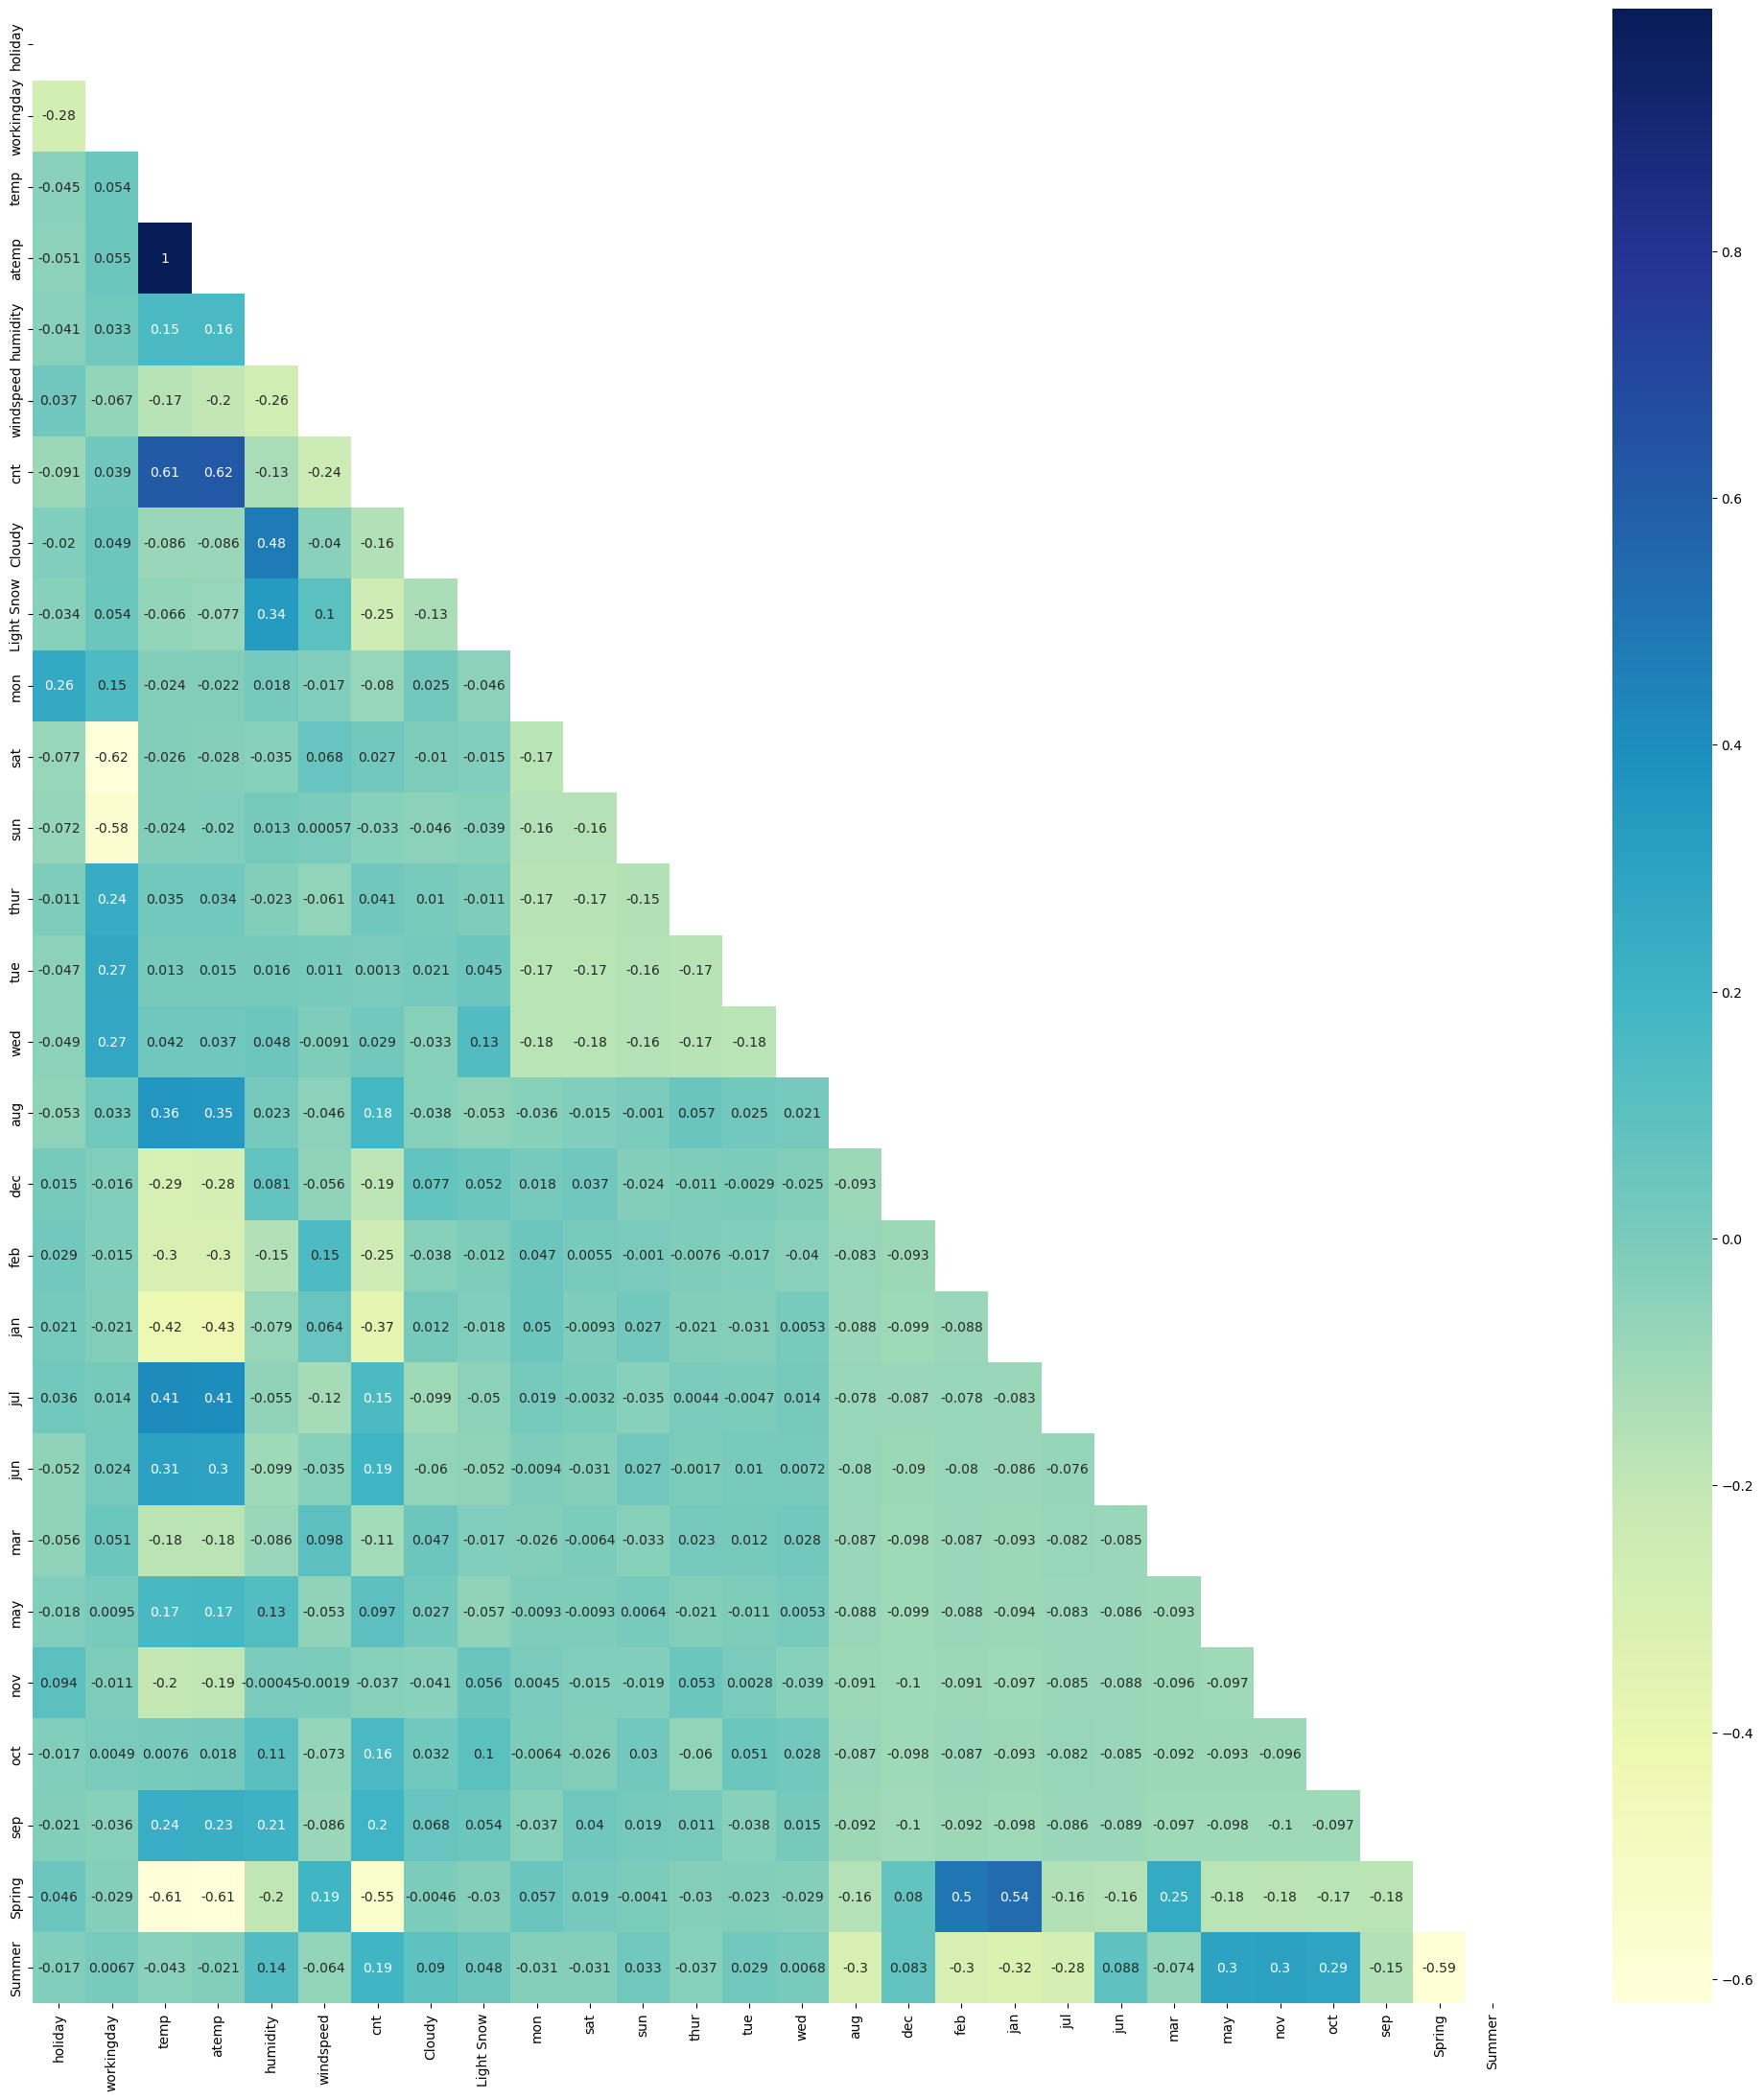

In [40]:
#Let's check the correlation coefficients to see how variables are correlated 
plt.figure(figsize=(25,27))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

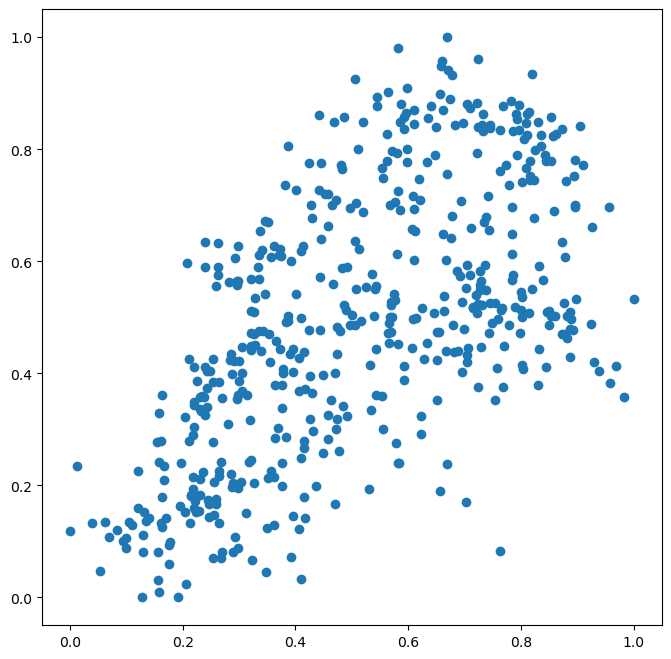

In [41]:
#Visualising one of the correlation to see the trend 
plt.figure(figsize=[8,8])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#from the scatter plot we can see a positive corelation between temp and cnt varaibles

In [42]:
#let's creae a linear  Model

y_train = df_train.pop('cnt')
X_train = df_train

In [55]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,  n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)


In [44]:
# selecting the list variables selected  in top 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Cloudy', True, 1),
 ('Light Snow', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', False, 9),
 ('thur', False, 14),
 ('tue', False, 11),
 ('wed', False, 13),
 ('aug', False, 3),
 ('dec', False, 8),
 ('feb', False, 6),
 ('jan', False, 12),
 ('jul', True, 1),
 ('jun', False, 10),
 ('mar', True, 1),
 ('may', False, 5),
 ('nov', False, 7),
 ('oct', True, 1),
 ('sep', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2)]

In [45]:
# Selecting the selected variables via REF in column list
colmn = X_train.columns[rfe.support_]
print(colmn)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Cloudy', 'Light Snow', 'sat', 'jul', 'mar', 'oct', 'sep',
       'Spring'],
      dtype='object')


In [46]:
# checking the rejected columns

X_train.columns[~rfe.support_]

Index(['mon', 'sun', 'thur', 'tue', 'wed', 'aug', 'dec', 'feb', 'jan', 'jun',
       'may', 'nov', 'Summer'],
      dtype='object')

In [56]:
def calculate_vif(bk_data):
    vif = pd.DataFrame()
    vif['Features'] = bike.columns
    vif['VIF'] = [variance_inflation_factor(bike_df.values, i) for i in range(bike.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_valuest(by = "VIF", ascending= False)
    return vif

In [57]:
X_train_rfe = X_train[colmn]

In [58]:
#Calculate the vif
calculate_vif(X_train_rfe)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
bike.head()

In [ ]:
#sns.pairplot(bike)
#plt.show()
#bike['weathersit'].value_counts()
weather = pd.get_dummies(bike['weathersit'])
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
bike = pd.concat([bike, weather], axis = 1)

In [ ]:
weath = [2,3,4]
weath_name = ['Clear', 'Light Snow', 'Heavy Rain']
zip_weath = list(zip(weath, weath_name))


In [ ]:
#bike=bike.drop(2, axis=1)
zip_weath

In [ ]:
bike.head()# = bike.drop([2,3], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

In [ ]:
df_train.describe()

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:

plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [ ]:

lr.params

In [ ]:
print(lr.summary())

In [ ]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'registered']]

In [ ]:
#

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
#print([i for i in range(X_train.shape[1])])
print(variance_inflation_factor(X_train.values, 'temp'))
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices